In [1]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5267 - accuracy: 0.7947 - val_loss: 0.4236 - val_accuracy: 0.8515
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3272 - accuracy: 0.8995 - val_loss: 0.3198 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2422 - accuracy: 0.9237 - val_loss: 0.2945 - val_accuracy: 0.8837
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.1913 - accuracy: 0.9398 - val_loss: 0.2862 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1573 - accuracy: 0.9501 - val_loss: 0.2791 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1294 - accuracy: 0.9589 - val_loss: 0.2890 - val_accuracy: 0.8829
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1085 - accuracy: 0.9673 - val_loss: 0.3132 - val_accuracy: 0.8840
Epoch 8/20
30

In [9]:
 history_dict = history.history

In [10]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

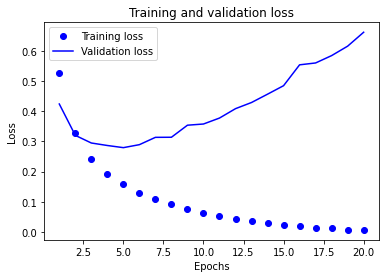

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

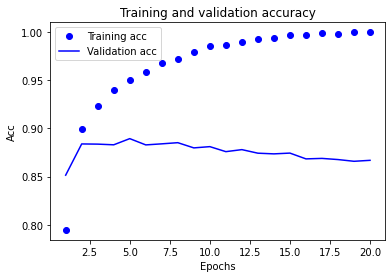

In [14]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()